#### **Time series analysis on the data International Airline passengers from 1940 to 1960**

In [16]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
# data fetch from github
df = pd.read_csv("AirPassengers.csv")
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
df.shape

(144, 2)

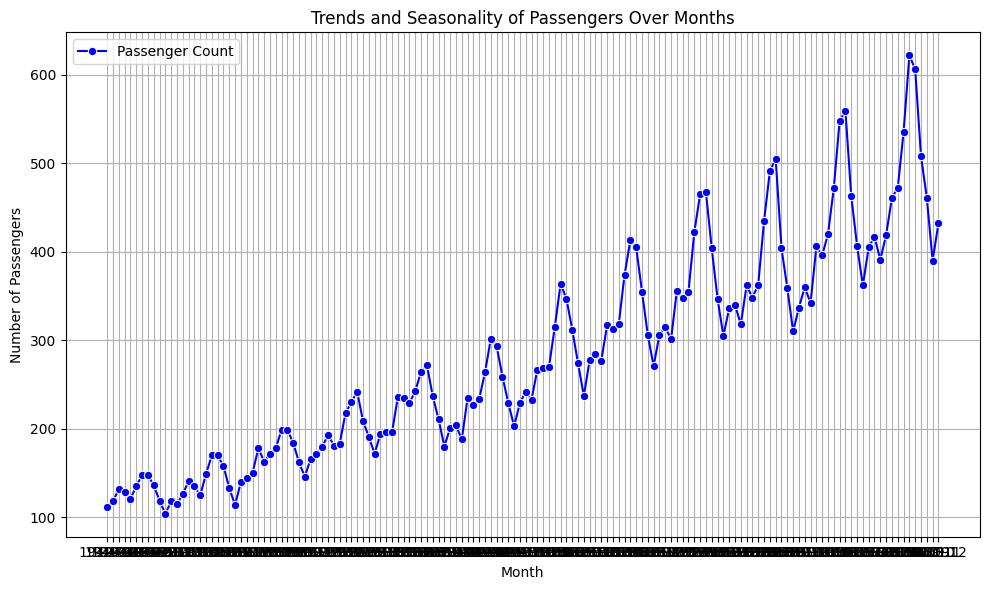

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame containing the data

# Set up the figure and axes
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot using seaborn
sns.lineplot(x="Month", y="#Passengers", data=df, marker='o', color='b', label='Passenger Count')

# Customize labels and title
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Trends and Seasonality of Passengers Over Months')

# Add grid for better readability
plt.grid(True)

# Optionally, add legend
plt.legend()

# Show plot
plt.tight_layout()  # Ensures labels and title fit nicely
plt.show()


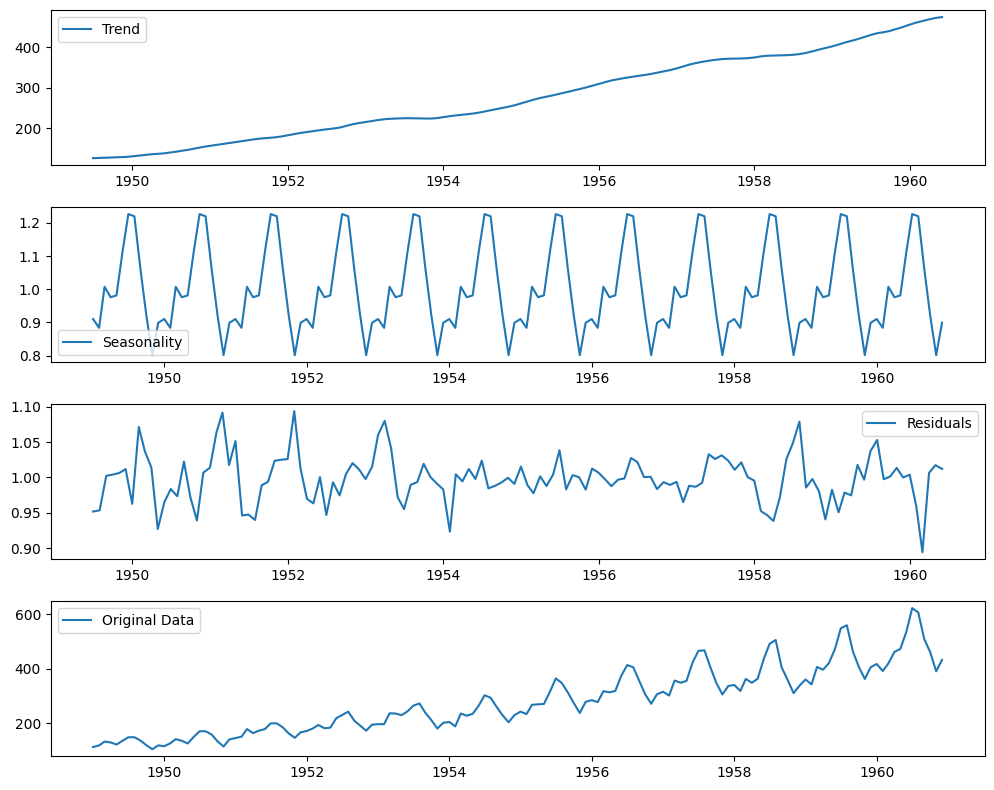

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df is your pandas DataFrame containing the time series data
df["Month"] = pd.to_datetime(df["Month"])  # Ensure "Month" column is datetime format
df.set_index("Month", inplace=True)  # Set "Month" as the index

# Perform seasonal decomposition (multiplicative model, period=12 for monthly data)
decompose = seasonal_decompose(df["#Passengers"], model="multiplicative", period=12)

# Plot the decomposition
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Plot trend component
plt.subplot(411)
plt.plot(decompose.trend, label='Trend')
plt.legend()

# Plot seasonal component
plt.subplot(412)
plt.plot(decompose.seasonal, label='Seasonality')
plt.legend()

# Plot residual component
plt.subplot(413)
plt.plot(decompose.resid, label='Residuals')
plt.legend()

# Plot original data
plt.subplot(414)
plt.plot(df["#Passengers"], label='Original Data')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [21]:
decompose.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [22]:
trend = decompose.trend

In [23]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


c:\conda_envs\logms\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 42923.1328 - root_mean_squared_error: 206.9132
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27551.5566 - root_mean_squared_error: 165.8819
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17296.4336 - root_mean_squared_error: 131.3512
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10697.4346 - root_mean_squared_error: 103.3282 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5694.2222 - root_mean_squared_error: 75.3185 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3054.9900 - root_mean_squared_error: 55.1967 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2000.2260 - root_mean_squared_error: 44.6104 
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1950.4983 - root_mean_squared_error: 44.0324 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1829.8578 - root_mean_squared_error: 42.4567
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st

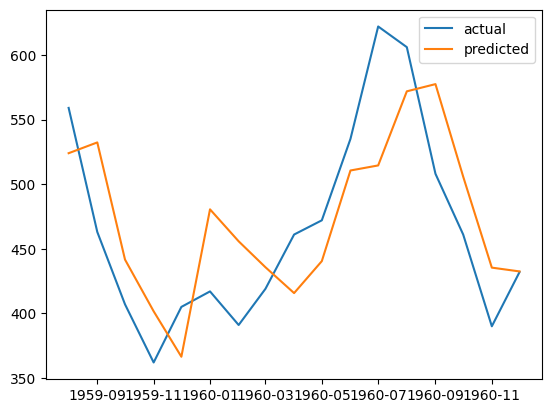

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["#Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["#Passengers"].values[n_lags:])
X_test = np.array([test["#Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["#Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()
